In [1]:
using CairoMakie
using ArchGDAL
using DataFrames
using MLJ

In [48]:
# Import geodatabase
gdb_path = "C:/Users/julio/Desktop/data/GDB_5PROV.gdb"
gdb = ArchGDAL.read(gdb_path) |>
x -> ArchGDAL.getlayer(x, 3)

df = DataFrame(gdb) |>
x -> select(x, Not([:Shape, :Id_micro, :Shape_Length, :Shape_Area]));

In [3]:
print(names(df))

["area_ha", "pas", "cul", "bn", "par", "por_pas", "por_cul", "veg_rem", "veg_prot", "veg_psb", "por_veg_rem", "por_veg_prot", "por_veg_psb", "conv_0818", "veg_rem_08", "por_conv_0818", "cos_mean", "mos_alto", "por_mos_alto", "pend_100", "pas_pend_100", "cul_pend_100", "por_pas_pend_100", "por_cul_pend_100", "elev_mean", "slop_mean", "vpri_km", "vloc_km", "vsec_km", "vtot_km", "dens_via", "prio_rest", "apc", "deg0_lev1", "deg0_lev2", "deg0_lev3", "deg0_lev4", "deg1_lev1", "deg1_lev2", "deg1_lev3", "deg1_lev4", "veg_rem_prot_psb", "por_veg_rem_prot_psb", "veg_rem_arb_herb", "mos_agro"]

In [9]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,area_ha,1375.99,96.48,1115.64,6097.59,0,Float64
2,pas,290.467,0.0,144.703,3376.14,0,Float64
3,cul,104.078,0.0,9.46751,3626.62,0,Float64
4,bn,217.291,0.0,0.534724,4194.8,0,Float64
5,par,281.556,0.0,0.0,4515.92,0,Float64
6,por_pas,20.904,0.0,14.4382,95.198,0,Float64
7,por_cul,7.95373,0.0,0.843875,98.3726,0,Float64
8,veg_rem,687.077,0.0,473.753,5033.26,0,Float64
9,veg_prot,197.242,0.0,0.0,4958.53,0,Float64


In [5]:
println([(m.name, m.package_name) for m in models(matching(df)) if m.is_pure_julia == true && m.is_supervised == false])

[("ABODDetector", "OutlierDetectionNeighbors"), ("AEDetector", "OutlierDetectionNetworks"), ("COFDetector", "OutlierDetectionNeighbors"), ("ContinuousEncoder", "MLJModels"), ("DNNDetector", "OutlierDetectionNeighbors"), ("FactorAnalysis", "MultivariateStats"), ("FeatureSelector", "MLJModels"), ("FillImputer", "MLJModels"), ("GMMClusterer", "BetaML"), ("ICA", "MultivariateStats"), ("KMeans", "BetaML"), ("KMeans", "Clustering"), ("KMeans", "ParallelKMeans"), ("KMedoids", "BetaML"), ("KMedoids", "Clustering"), ("KNNDetector", "OutlierDetectionNeighbors"), ("KernelPCA", "MultivariateStats"), ("LOFDetector", "OutlierDetectionNeighbors"), ("MissingImputator", "BetaML"), ("OneHotEncoder", "MLJModels"), ("PCA", "MultivariateStats"), ("PPCA", "MultivariateStats"), ("Standardizer", "MLJModels"), ("TSVDTransformer", "TSVD")]


In [67]:
# Modeling section
model = @load KMeans pkg=Clustering verbosity=0
pipe = @pipeline Standardizer model(k=5)
m = machine(pipe, df) |> fit!

┌ Info: Training Machine{Pipeline296,…}.
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Info: Training Machine{Standardizer,…}.
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Info: Training Machine{KMeans,…}.
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\QXObv\src\machines.jl:403


Machine{Pipeline296,…} trained 1 time; caches data
  args: 
    1:	Source @342 ⏎ `Table{AbstractVector{Continuous}}`


In [69]:
fp = fitted_params(m)

(k_means = (centers = [-0.14883680894301626 -0.30866437341483666 … 1.6432989020830486 0.3152005248362385; -0.5030719195081619 0.2633592866120798 … 0.4056542875853352 -0.13006752560488663; … ; -0.17611437412346817 0.018882725160367913 … 0.4896450506423945 -0.0019466817804760495; -0.39851144028580515 -0.11488065463873334 … -0.38788200069580026 1.2497714349661853],),
 standardizer = Dict(:por_veg_prot => (17.86964320727548, 35.646363495224506), :veg_psb => (21.037231719401632, 93.44099803057158), :deg1_lev3 => (17.54986227730666, 88.15002550793876), :vloc_km => (5.822091740351258, 11.135251748777916), :veg_prot => (197.24198825050524, 504.85404735040856), :pas => (290.4672064598092, 379.4479655259307), :mos_agro => (174.06021984582586, 322.35948070599795), :deg1_lev1 => (95.45478647624417, 302.09523808429117), :cos_mean => (65.26721783308089, 35.099615521245845), :vsec_km => (2.3799674894431266, 4.649866633111325)…),
 machines = Machine[Machine{Standardizer,…}, Machine{KMeans,…}],
 fitted

In [70]:
r = report(m)

(k_means = (assignments = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  2, 5, 2, 1, 1, 2, 5, 5, 2, 2],
            cluster_labels = CategoricalArrays.CategoricalValue{Int64, UInt32}[1, 2, 3, 4, 5],),
 standardizer = (features_fit = [:por_veg_prot, :veg_psb, :deg1_lev3, :vloc_km, :veg_prot, :pas, :mos_agro, :deg1_lev1, :cos_mean, :vsec_km  …  :elev_mean, :dens_via, :deg0_lev1, :por_cul_pend_100, :deg1_lev2, :deg0_lev3, :pend_100, :por_veg_rem_prot_psb, :deg0_lev4, :deg0_lev2],),
 machines = Machine[Machine{Standardizer,…}, Machine{KMeans,…}],
 report_given_machine = OrderedCollections.LittleDict{Any, Any, Vector{Any}, Vector{Any}}(Machine{Standardizer,…} => (features_fit = [:por_veg_prot, :veg_psb, :deg1_lev3, :vloc_km, :veg_prot, :pas, :mos_agro, :deg1_lev1, :cos_mean, :vsec_km  …  :elev_mean, :dens_via, :deg0_lev1, :por_cul_pend_100, :deg1_lev2, :deg0_lev3, :pend_100, :por_veg_rem_prot_psb, :deg0_lev4, :deg0_lev2],), Machine{KMeans,…} => (assignments = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  2, 5, 2, 1

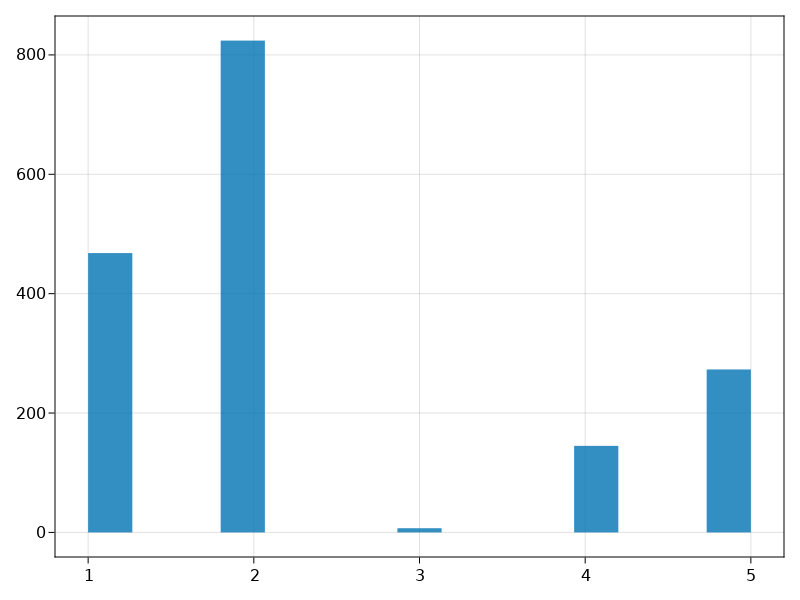

In [71]:
results = collect(r.k_means[1])
hist(results)